# Explore here

In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# URL of the CSV file
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'

# Read the CSV file from the URL and save it as a DataFrame
df = pd.read_csv(url, delimiter=';')

# Save the DataFrame to a CSV file in your project directory
df.to_csv('../data/raw/bank-marketing-campaign-data.csv', index=False)

print("CSV file has been downloaded and saved as a DataFrame.")

CSV file has been downloaded and saved as a DataFrame.


In [27]:

print(df.shape)
print(df.info())
print(df.head())
print(df.describe())
print(df.columns)

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

In [28]:
print(df.isnull().sum())
df.describe()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


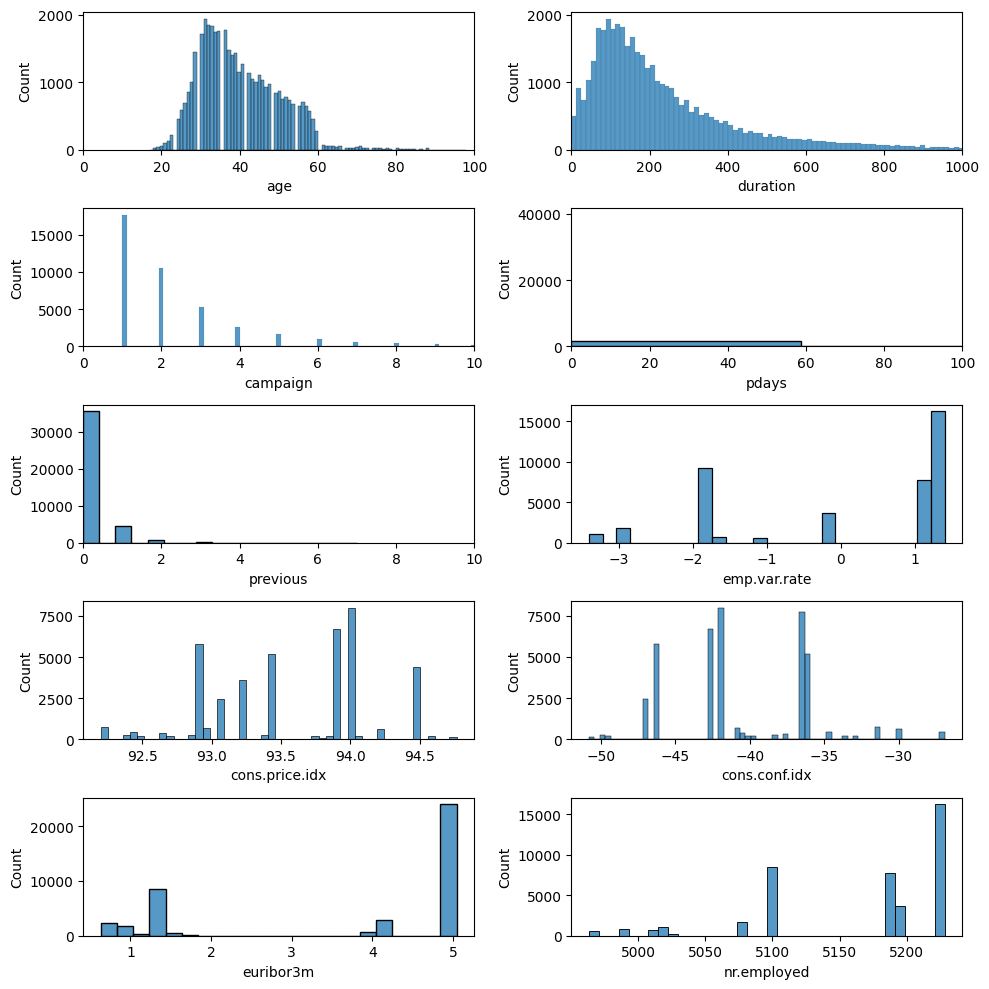

In [29]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))

sns.histplot(ax=axes[0,0], data=df, x="age").set_xlim(0, 100)
sns.histplot(ax=axes[0,1], data=df, x="duration").set_xlim(0, 1000)
sns.histplot(ax=axes[1,0], data=df, x="campaign").set_xlim(0, 10)   
sns.histplot(ax=axes[1,1], data=df, x="pdays").set_xlim(0, 100)
sns.histplot(ax=axes[2,0], data=df, x="previous").set_xlim(0, 10)
sns.histplot(ax=axes[2,1], data=df, x="emp.var.rate")
sns.histplot(ax=axes[3,0], data=df, x="cons.price.idx")
sns.histplot(ax=axes[3,1], data=df, x="cons.conf.idx")
sns.histplot(ax=axes[4,0], data=df, x="euribor3m")
sns.histplot(ax=axes[4,1], data=df, x="nr.employed")


plt.tight_layout()
plt.show()

In [30]:
print(df['pdays'].value_counts())
print(df['pdays'])
#what are all of the unique values in the 'pdays' column?
print(df['pdays'].unique())

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64
0        999
1        999
2        999
3        999
4        999
        ... 
41183    999
41184    999
41185    999
41186    999
41187    999
Name: pdays, Length: 41188, dtype: int64
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


In [31]:
df = df.drop(columns=['pdays'])

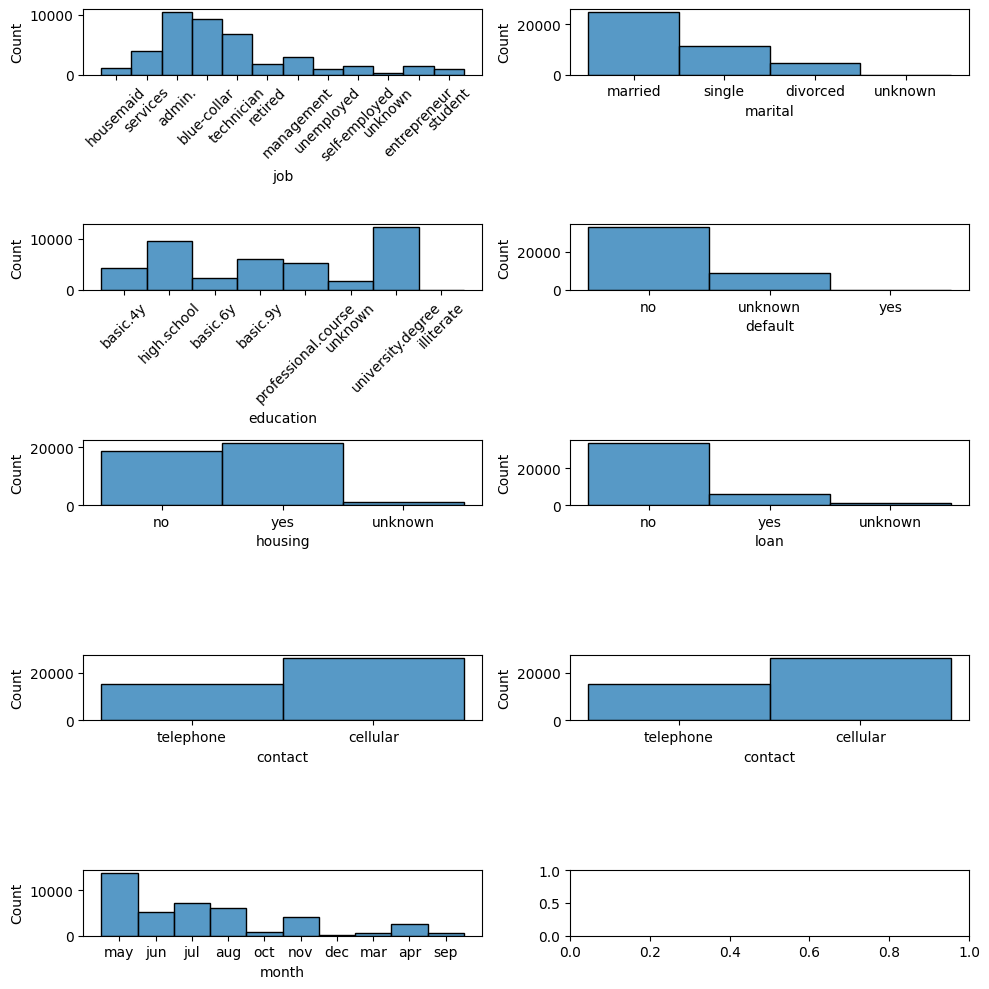

In [32]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))

sns.histplot(ax=axes[0,0], data=df, x="job")
axes[0,0].tick_params(axis='x', rotation=45)
sns.histplot(ax=axes[0,1], data=df, x="marital")
sns.histplot(ax=axes[1,0], data=df, x="education")   
axes[1,0].tick_params(axis='x', rotation=45)
sns.histplot(ax=axes[1,1], data=df, x="default")
sns.histplot(ax=axes[2,0], data=df, x="housing")
sns.histplot(ax=axes[2,1], data=df, x="loan")
sns.histplot(ax=axes[3,0], data=df, x="contact")
sns.histplot(ax=axes[3,1], data=df, x="contact")
sns.histplot(ax=axes[4,0], data=df, x="month")



plt.tight_layout()
plt.show()

In [33]:
df = df.drop(columns=['day_of_week'])

In [34]:
#I have now dropped 'day of week' and 'pdays' columns from the dataset. Uniform distribution for day of week and for pdays, 999 is the most common value.

In [35]:
#Now I want to make the categorical columns into numerical columns. I will use the factorize method to do this.
# df_1['job'] = pd.factorize(df['job'])[0]
# df_1['marital'] = pd.factorize(df['marital'])[0]
# df_1['education'] = pd.factorize(df['education'])[0]
# df_1['default'] = pd.factorize(df['default'])[0]
# df_1['housing'] = pd.factorize(df['housing'])[0]
# df_1['loan'] = pd.factorize(df['loan'])[0]
# df_1['contact'] = pd.factorize(df['contact'])[0]
# df_1['month'] = pd.factorize(df['month'])[0]
# df_1['poutcome'] = pd.factorize(df['poutcome'])[0]
# df_1['y'] = pd.factorize(df['y'])[0]


#I will use the get_dummies method to convert the categorical columns into numerical columns.
df_cat_cols = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'], dtype=float, drop_first=True) 

#print(df_cat_cols.head())
print(df.columns)
print(df_cat_cols.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact

<Axes: >

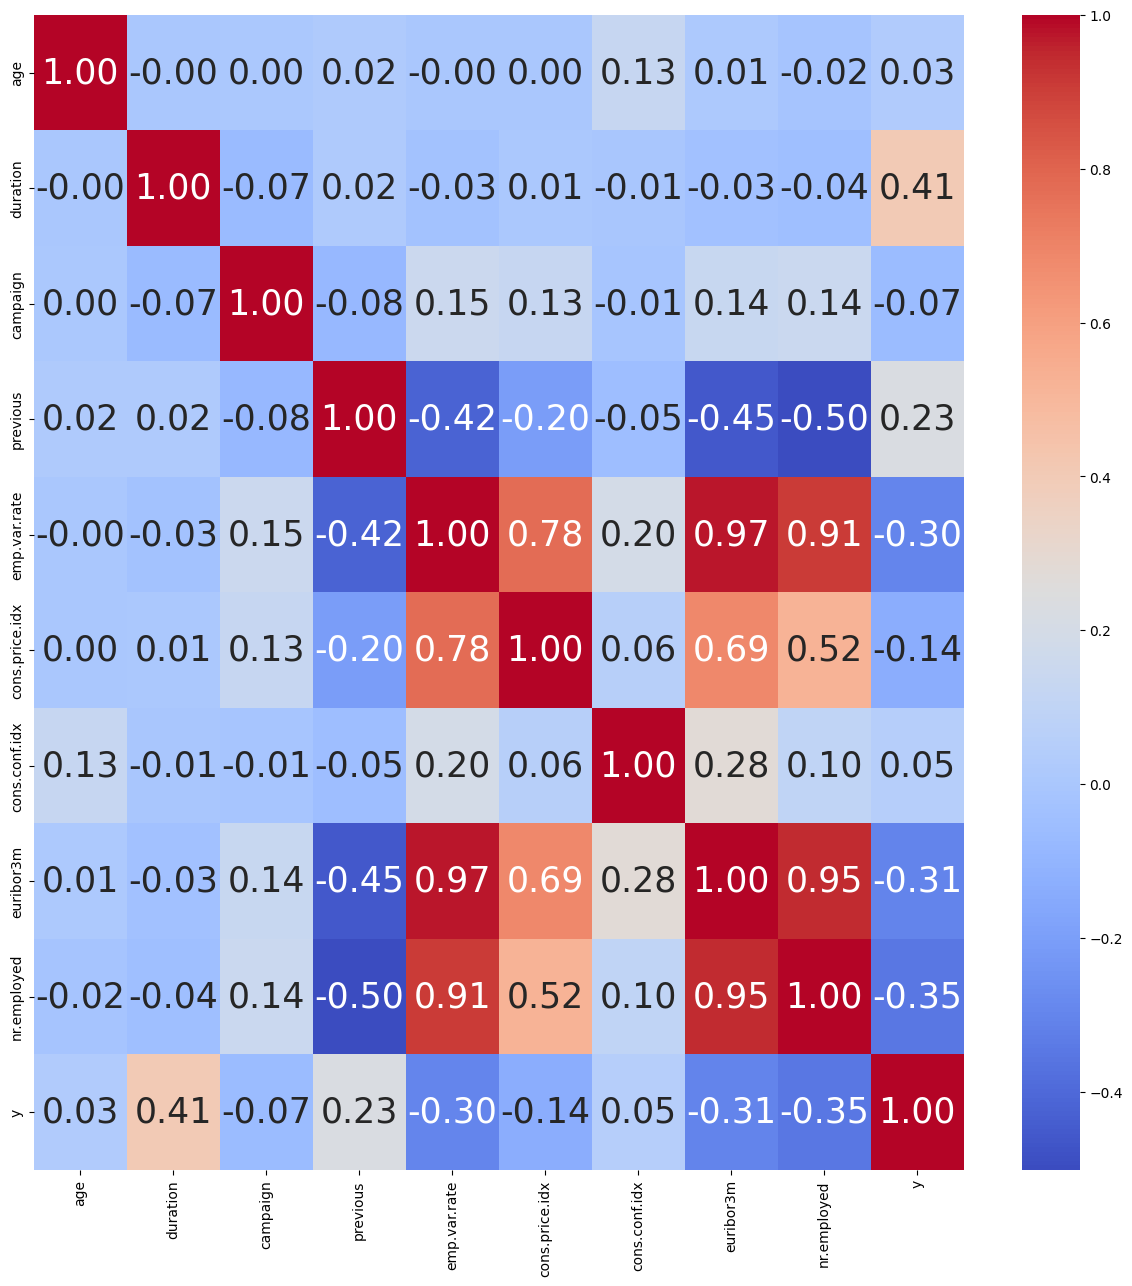

In [36]:
# Convert 'y' column to numerical values
df['y'] = df['y'].map({'yes': 1, 'no': 0})

fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(df[['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].corr(), annot=True, fmt =".2f", cmap="coolwarm", annot_kws={"size":25})   

In [37]:
print(df['y'].value_counts())
print(df.columns)

y
0    36548
1     4640
Name: count, dtype: int64
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')


In [38]:
print(df_cat_cols.columns)

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')


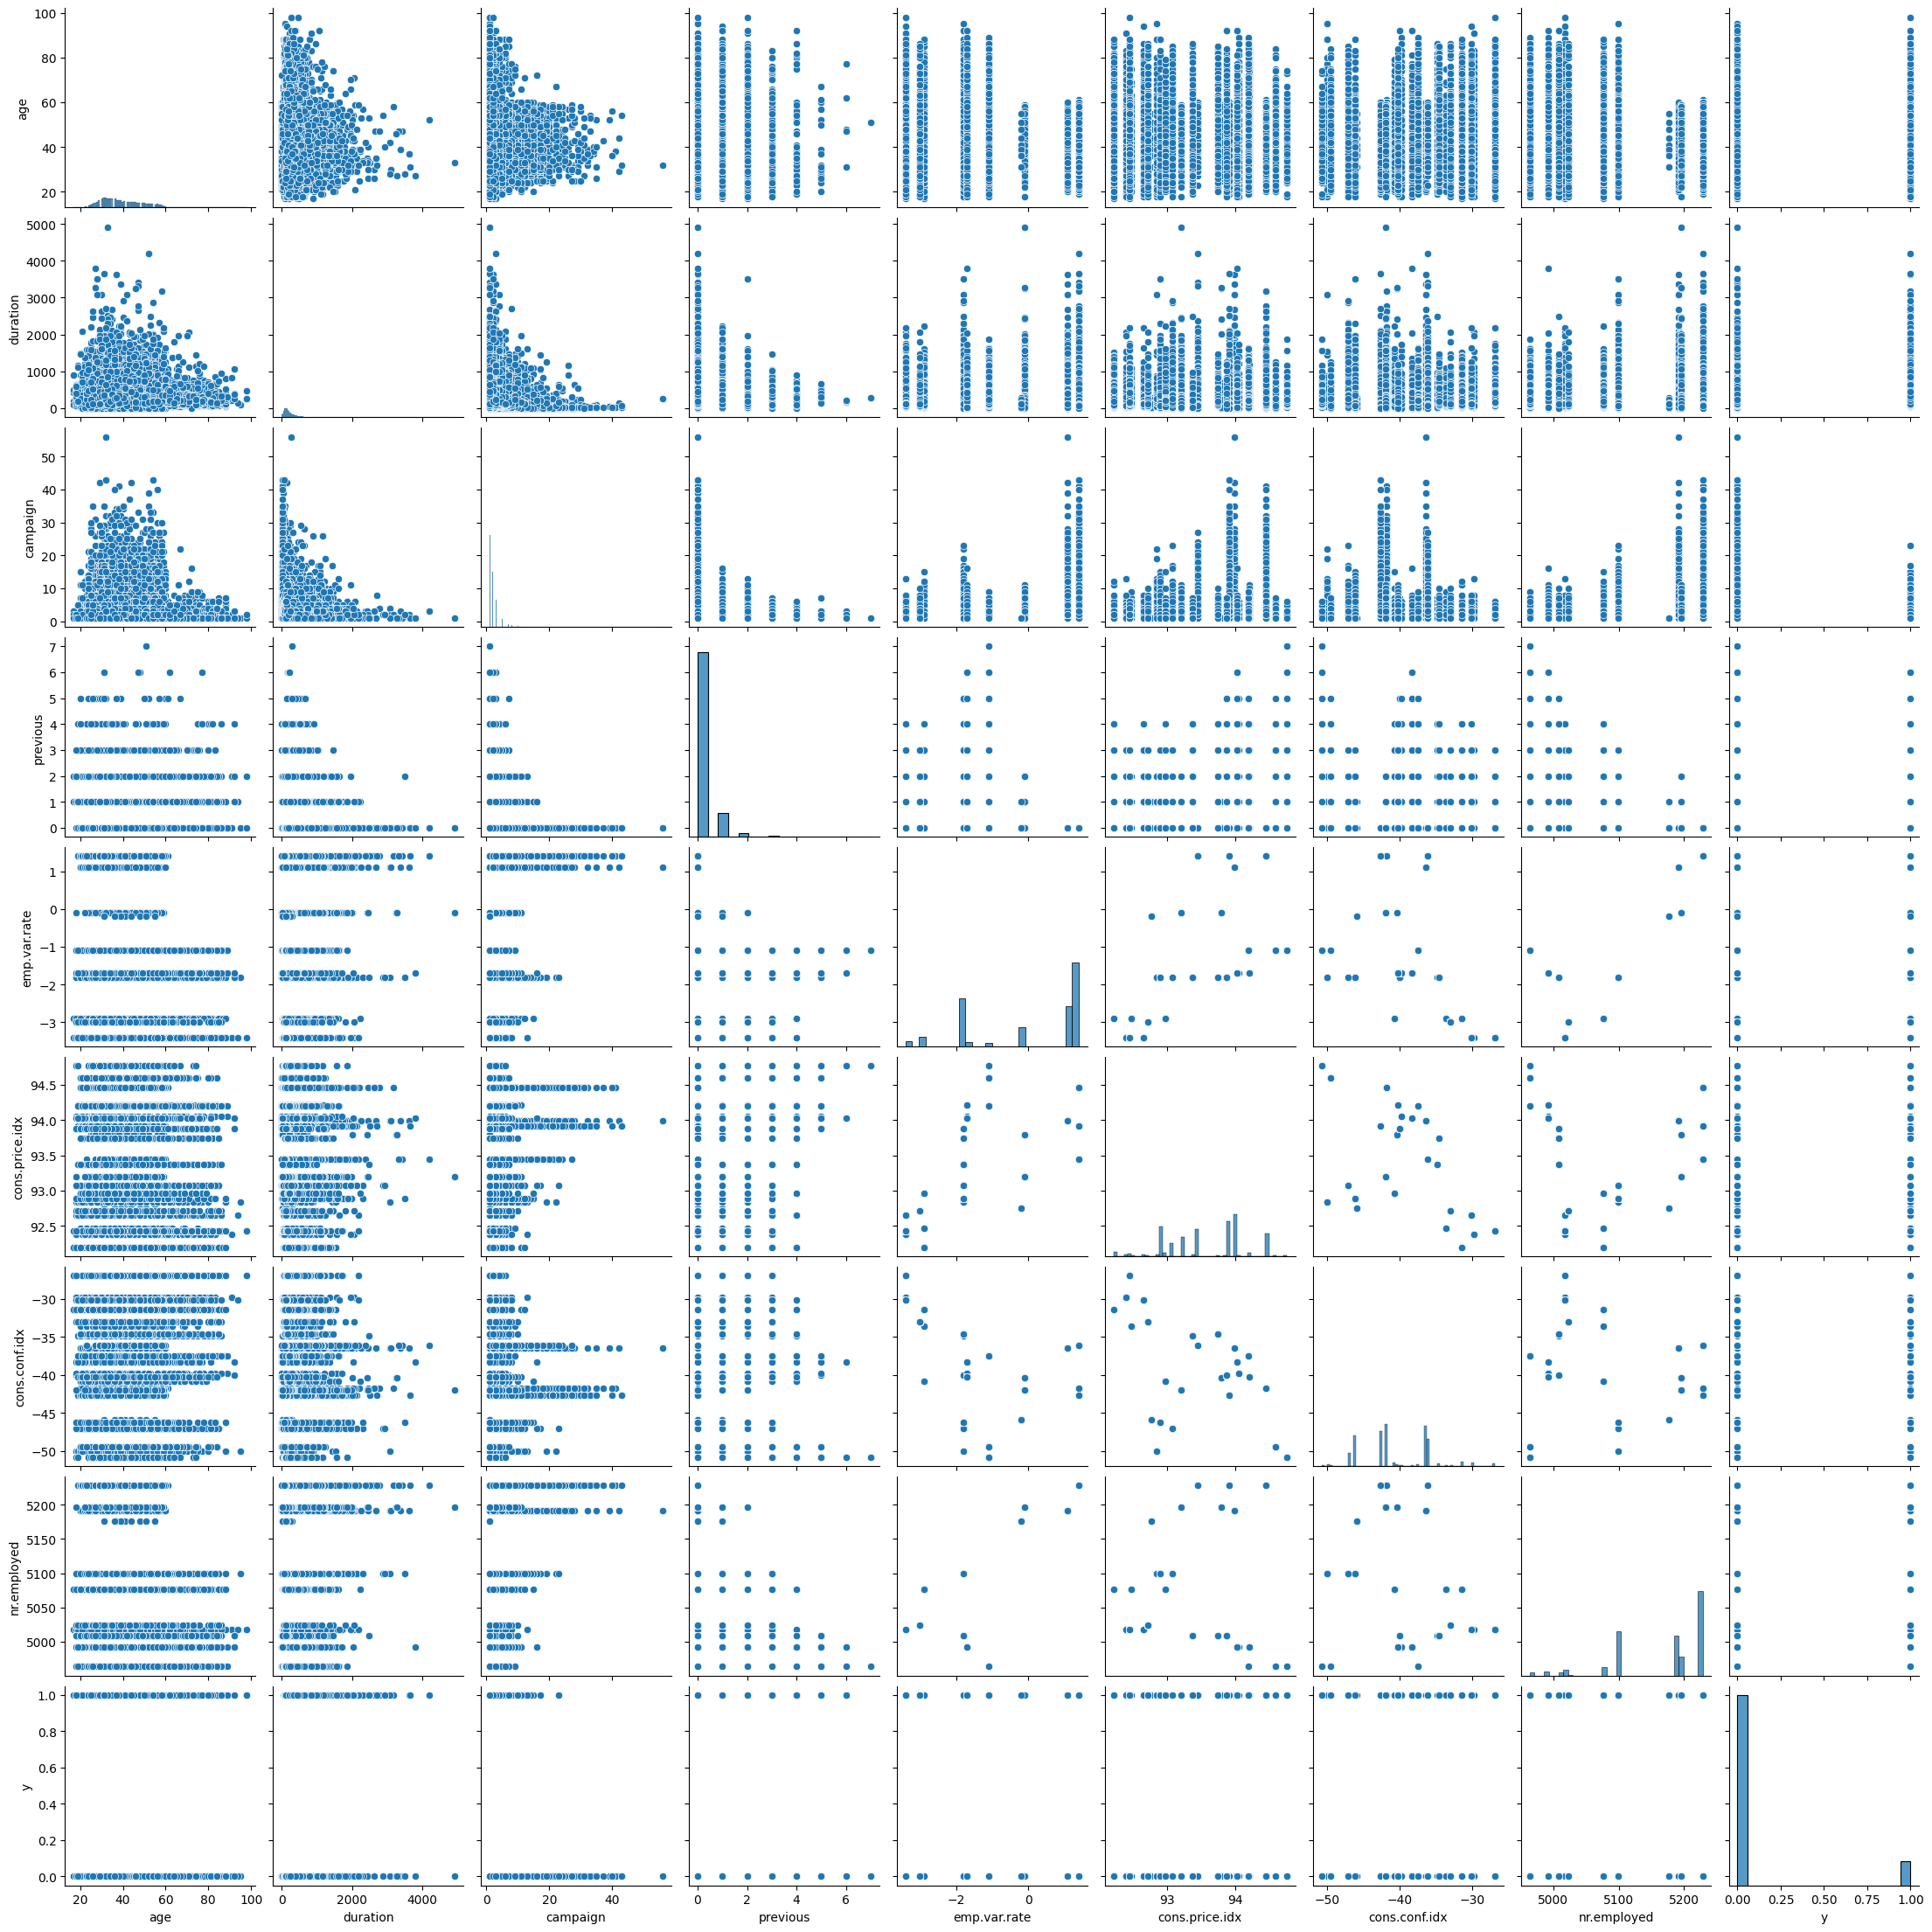

In [39]:
sns.pairplot(data=df[['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'y']])

In [40]:
print(df_cat_cols.describe())
print(df_cat_cols.head())



               age      duration      campaign      previous  emp.var.rate  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593      0.172963      0.081886   
std       10.42125    259.279249      2.770014      0.494901      1.570960   
min       17.00000      0.000000      1.000000      0.000000     -3.400000   
25%       32.00000    102.000000      1.000000      0.000000     -1.800000   
50%       38.00000    180.000000      2.000000      0.000000      1.100000   
75%       47.00000    319.000000      3.000000      0.000000      1.400000   
max       98.00000   4918.000000     56.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  \
count    41188.000000   41188.000000  41188.000000  41188.000000   
mean        93.575664     -40.502600      3.621291   5167.035911   
std          0.578840       4.628198      1.734447     72.251528   
min         92.201000    

In [41]:
#Not sure if I should remove 'previous' feature. may keep it in this notebook

print(df['previous'].value_counts())

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64


In [42]:
#note that df_cat_cols has cat and num features. 
print(df_cat_cols.columns)

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')


In [43]:
#for logistic regression, we should scale (or normalize)

# scaler = MinMaxScaler()
# df_cat_cols[df_cat_cols.select_dtypes(include=['number']).columns] = scaler.fit_transform(df_cat_cols.select_dtypes(include=['number']))

print(df_cat_cols)

       age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
0       56       261         1         0           1.1          93.994   
1       57       149         1         0           1.1          93.994   
2       37       226         1         0           1.1          93.994   
3       40       151         1         0           1.1          93.994   
4       56       307         1         0           1.1          93.994   
...    ...       ...       ...       ...           ...             ...   
41183   73       334         1         0          -1.1          94.767   
41184   46       383         1         0          -1.1          94.767   
41185   56       189         2         0          -1.1          94.767   
41186   44       442         1         0          -1.1          94.767   
41187   74       239         3         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_jul  \
0              -36.4      4.85

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_cat_cols.drop(columns=['y_yes']), df_cat_cols['y_yes'], test_size=0.2)    

scaler = MinMaxScaler()
#df_cat_cols[df_cat_cols.select_dtypes(include=['number']).columns] = scaler.fit_transform(df_cat_cols.select_dtypes(include=['number']))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy


0.9085943190094683

In [49]:
print(X_train_scaled)
print(y_train.head)

[[0.60493827 0.03357942 0.05454545 ... 0.         0.         0.        ]
 [0.38271605 0.01929031 0.16363636 ... 0.         1.         0.        ]
 [0.44444444 0.02738747 0.01818182 ... 0.         0.         0.        ]
 ...
 [0.2345679  0.05096452 0.01818182 ... 0.         1.         0.        ]
 [0.19753086 0.00381043 0.01818182 ... 0.         1.         0.        ]
 [0.07407407 0.08120981 0.         ... 0.         0.         1.        ]]
<bound method NDFrame.head of 39176    0.0
11580    0.0
26798    0.0
34097    0.0
38259    1.0
        ... 
5993     0.0
9006     0.0
29130    0.0
13909    0.0
37627    1.0
Name: y_yes, Length: 32950, dtype: float64>


In [50]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid = GridSearchCV(model, hyperparams, scoring='accuracy', cv=5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [53]:
def warn(*args, **kwargs):
    pass
import warnings

warnings.warn= warn
grid.fit(X_train_scaled, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [54]:
model_grid = LogisticRegression(penalty = "l2", C = 100, solver = "lbfgs")
model_grid.fit(X_train_scaled, y_train)
y_pred = model_grid.predict(X_test_scaled)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

print(y_pred)
print(grid_accuracy)


[0. 0. 0. ... 0. 0. 0.]
0.9104151493080845


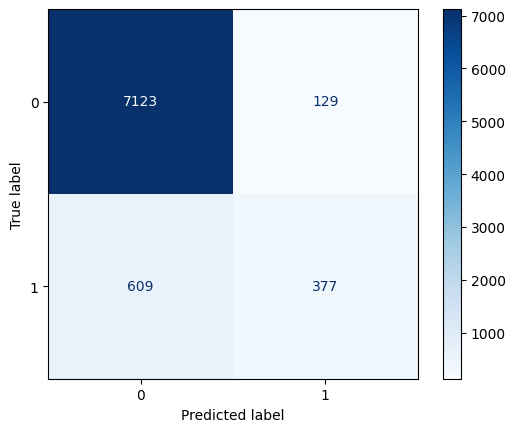

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay





cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

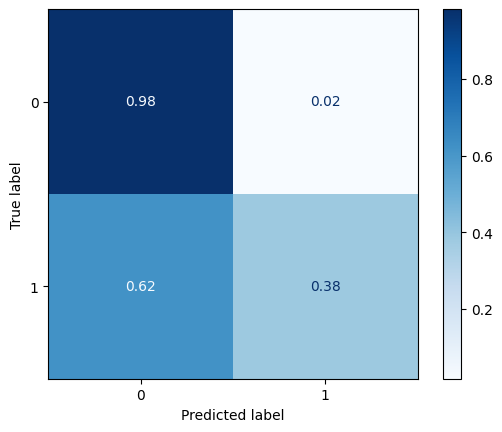

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix (row-wise normalization)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Display the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # Format to show two decimal places

plt.show()